<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Zomeb0dy/blob/main/Delfin2022_CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de datos (muon-muon)**


Francisco Porfirio Gonzalez Santos

Programa Delfin 25/06/25

**DATOS Y BIBLIOTECAS A UTILIZAR**

In [1]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()
#Datos a Utilizar:
print(particles)

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
4     165617    75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9995  173692  1245050481   8.9721 -1.6158 -2.7176   1 -0.0294  8.7183   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987  -1  0.0712  3.4221  
1     28.5389  0.38

**Información de los datos:**

**Donde:**

**Run:** es el numero de corrida del evento  (variable entera)

**Event:** es el numero del evento (variable entera)

**pt1 y pt2:** son los momentos transversos para cada muon(o jet), (Variable decimal)

**eta1 y eta2**: son la pseudo rapidez de cada muon(o jet), la pseudorapidez, es la coordenada que describe el angulo de una particula (o jet), relativo al eje del haz, cuando esta es 0, implica que la particula generada es perpendicular al eje y cuando este es mayor, implica que la particula que es mas cercana al eje. (Variable decimal)

**phi1 y phi2**: es el angulo de la particula con respecto al eje x (Variable decimal)

**Q1 y Q2**: son las cargas de cada particula (variable entera)

**dxy1 y dxy2**:son los parámetros de impacto en el plano transversal con respecto al vértice dek muón, herramienta clave para distinguir entre muones producidos directamente en la interacción y aquellos provenientes de decaimientos secundarios. (Variable decimal).

**iso1 y iso2**: es el aislamiento comvinado de (track + Ecal + Hcal), nos ayuda a diferenciar si se trata de un jet o una particula.

In [2]:
#Información sobre los datos a anaizar
particles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10000 non-null  int64  
 1   Event   10000 non-null  int64  
 2   pt1     10000 non-null  float64
 3   eta1    10000 non-null  float64
 4   phi1    10000 non-null  float64
 5   Q1      10000 non-null  int64  
 6   dxy1    10000 non-null  float64
 7   iso1    10000 non-null  float64
 8   pt2     10000 non-null  float64
 9   eta2    10000 non-null  float64
 10  phi2    10000 non-null  float64
 11  Q2      10000 non-null  int64  
 12  dxy2    10000 non-null  float64
 13  iso2    10000 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


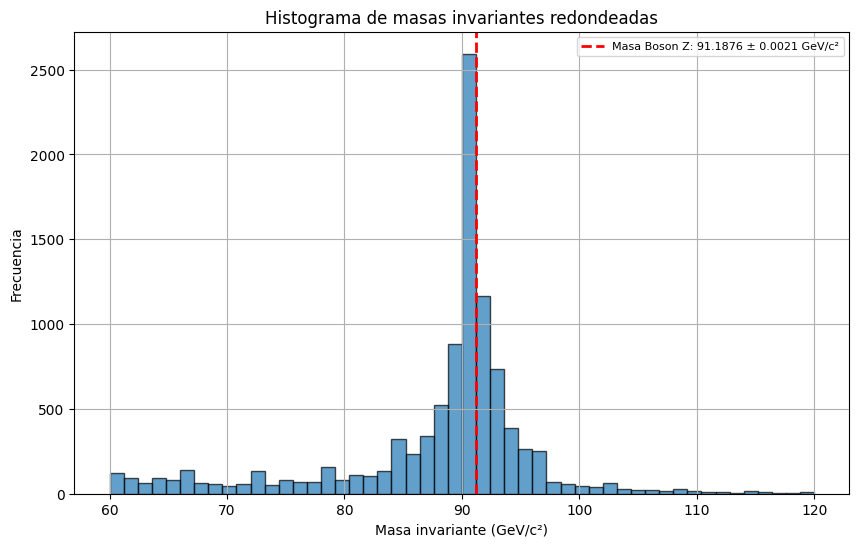

In [3]:
#Histograma de Masas para los Datos puros

# Crear la lista de masas invariantes (sin redondear)
M_i = np.sqrt( 2 * particles['pt1'] * particles['pt2'] * (np.cosh(particles['eta1'] - particles['eta2']) - np.cos(particles['phi1'] - particles['phi2'])))

# Crear la lista de masas redondeadas
masas_redondeadas = np.round(M_i).tolist()

# Crear el histograma de las masas redondeadas
plt.figure(figsize=(10, 6))
plt.hist(masas_redondeadas, bins=50, edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()



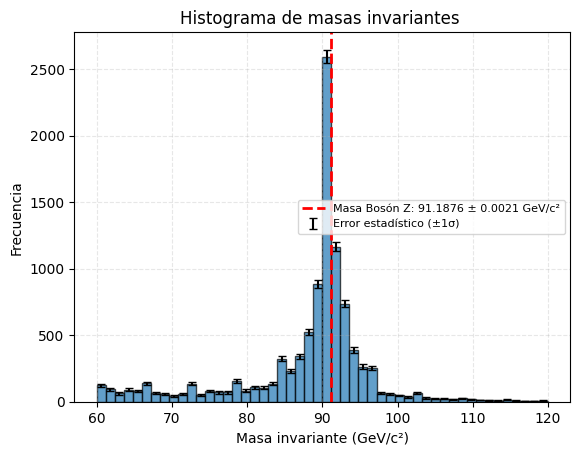

In [4]:

# Calcular las masas invariantes
M_i = np.sqrt(2 * particles['pt1'] * particles['pt2'] *
              (np.cosh(particles['eta1'] - particles['eta2']) -
               np.cos(particles['phi1'] - particles['phi2'])))

# Redondear y crear histograma
masas_redondeadas = np.round(M_i)
bin_counts, bin_edges, _ = plt.hist(masas_redondeadas, bins=50, edgecolor='black', alpha=0.7)

# Calcular errores estadísticos (Poisson: sqrt(N))
bin_errors = np.sqrt(bin_counts)

# Graficar con barras de error
plt.errorbar(
    x=(bin_edges[:-1] + bin_edges[1:]) / 2,  # Centro del bin
    y=bin_counts,
    yerr=bin_errors,
    fmt='none',  # Sin línea conectando puntos
    ecolor='black',  # Color de las barras de error
    capsize=3,    # Tamaño de las "tapas" de las barras
    label='Error estadístico (±1σ)'
)

#systematic_error = 0.05 * bin_counts

#plt.fill_between(
    #x=(bin_edges[:-1] + bin_edges[1:]) / 2,
    #y1=bin_counts - systematic_error,
    #y2=bin_counts + systematic_error,
    #color='gray',
    #alpha=0.3,
    #label='Error sistemático (2%)'
#)

# Línea vertical para la masa del bosón Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Bosón Z: 91.1876 ± 0.0021 GeV/c²')

# Ajustes estéticos
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes ')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

GRAFICO ETA1 X ETA2

In [5]:
fig = px.scatter(particles,
                 x='eta1',
                 y='eta2',
                 title='Relación entre Eta1 y Eta2',
                 labels={'Eta1': 'Pseudorapidez η₁', 'Eta2': 'Pseudorapidez η₂'},
                 opacity=0.5,
                 template='plotly_white',
                 width=800,
                 height=600)

fig.update_layout(title_x=0.5)
fig.show()

**Filtración Por Cargas**

In [6]:
#Conteo de datos para cada carga
A = particles['Q1'].value_counts()
print(A)
B = particles['Q2'].value_counts()
print(B)


Q1
-1    5156
 1    4844
Name: count, dtype: int64
Q2
 1    5192
-1    4808
Name: count, dtype: int64


In [7]:
#Conteo de eventos con carga diferente (mejores candidatos a Bosones Z)
eventos_diferentes = particles[particles['Q1'] != particles['Q2']]
print("Eventos con Q1 ≠ Q2:")
print(eventos_diferentes.head())
print("Número de eventos con cargas diferentes:", len(eventos_diferentes))

Eventos con Q1 ≠ Q2:
      Run     Event      pt1    eta1    phi1  Q1    dxy1    iso1      pt2  \
0  165617  74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999  34.2464   
1  165617  75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000  28.5389   
2  165617  75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000  30.2344   
3  165617  75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000  48.2790   
4  165617  75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280  43.4508   

     eta2    phi2  Q2    dxy2    iso2  
0 -0.9885 -0.4987  -1  0.0712  3.4221  
1  0.3852 -1.9912   1  0.0515  0.0000  
2 -0.4684  1.8833   1 -0.0876  0.0000  
3 -0.1956  2.9703  -1 -0.0492  0.0000  
4  0.5910 -0.0428  -1  0.0442  0.0000  
Número de eventos con cargas diferentes: 9664


In [8]:
#Conteo de eventos con carga iguales (Malos candidatos a Bosones Z)
eventos_iguales = particles[particles['Q1'] == particles['Q2']]
print("Eventos con Q1 = Q2:")
print(eventos_iguales.head())
print("Número de eventos con cargas iguales:", len(eventos_iguales))

T = len(eventos_iguales)*100/10000
print("Porcentaje de eventos con carga igual en la base de datos",T)

Eventos con Q1 = Q2:
        Run      Event      pt1    eta1    phi1  Q1    dxy1      iso1  \
19   165617   78693707  21.3986 -1.6865  0.0905   1  0.0263    4.4573   
95   165617   94212340  14.9992  1.6421  2.4363  -1 -0.3397    0.0000   
113  165617   96375401  21.9996  1.1763  2.1764   1 -0.0834  184.7280   
157  165617  104730772  36.2004  1.4893  0.4355  -1  0.0026    1.3959   
165  165617  106617185  17.2939 -1.2052  0.7373   1 -0.0290    0.6563   

         pt2    eta2    phi2  Q2    dxy2      iso2  
19   10.8491  1.2098  3.0488   1 -0.0430   38.1065  
95   22.7487 -0.7225 -0.2626  -1  0.0581    2.3225  
113  33.9558  0.0720 -0.9118   1  0.0808  112.7960  
157  11.9339 -0.6476 -2.1759  -1  0.0349    2.5531  
165  31.9684  0.2569 -2.2568   1  0.0337    2.6572  
Número de eventos con cargas iguales: 336
Porcentaje de eventos con carga igual en la base de datos 3.36


Es decir, hay 336 eventos en los que Q1 y Q2 son iguales, siendo esto un 3.36% de los eventos totales.

**Para diferenciar cuales eventos iguales son de carga -1 y de carga 1, realizamos el siguientes histograma**:

In [9]:
#Histograma diferenciación de cargas
px.histogram(
    particles,
    x='Q1',
    color='Q2',
    barmode='group',
    title="Distribución de cargas Q1 vs Q2",
    # Mejoras sugeridas:
    labels={'Q1': 'Valor de carga Q1', 'Q2': 'Tipo de carga Q2'},  # Etiquetas más descriptivas
    opacity=0.8,  # Mayor transparencia para mejor visualización de barras superpuestas
    nbins=20,     # Ajustar número de bins para mejor resolución
    marginal='box',  # Añadir gráfico marginal para ver outliers
    template='plotly_white',  # Mejor tema visual
    hover_data=particles.columns,  # Mostrar más datos al hacer hover
    width=1000,   # Tamaño adecuado
    height=600,
    category_orders={'Q2': sorted(particles['Q2'].unique())}  # Orden consistente
).update_layout(
    bargap=0.1,  # Espacio entre barras de diferentes grupos
    legend_title_text='Signo de la Carga',
    xaxis_title="Distribución de cargas para Q1 y Q2",
    yaxis_title="Frecuencia",
    title_x=0.5  # Centrar título
).show()

Analizando el histograma podemos ver que, en 150 eventos las cargar son -1, eventos que podriamos asociar a decaimiento de bosones W-; y en 186 eventos las cargas son 1, eventos asociables a decaimiento de bosones W+. O en su defecto, podrian identificarse como jets mal interpretados como Muones.

**Para Purificar la lista de datos, se eliminaran los eventos con cargas iguales**

In [10]:
# Filtrar eventos donde Q1 ≠ Q2 (Mejores Candidatos a Boson Z)
eventos_Q_difs = particles[particles['Q1'] != particles['Q2']]
print("Eventos con cargas diferentes (Q1 ≠ Q2):")
print(eventos_Q_difs)
print("\nNúmero de eventos con cargas diferentes:", len(eventos_Q_difs))

Eventos con cargas diferentes (Q1 ≠ Q2):
         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
4     165617    75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987 

Se realizara una lista para los datos excluidos debido a tener cargas iguales

In [11]:
# Filtrar eventos donde Q1 = Q2 (Obtener masa transversal)
eventos_Q_ig = particles[particles['Q1'] == particles['Q2']]
print("Eventos con cargas iguales (Q1 = Q2):")
print(eventos_Q_ig)
print("\nNúmero de eventos con cargas iguales:", len(eventos_Q_ig))


#M_T = np.sqrt(2 * eventos_Q_ig['pt1'] * eventos_Q_ig['pt2'] * (np.cosh(eventos_Q_ig['eta1'] - eventos_Q_ig['eta2']) - np.cos(eventos_Q_ig['phi1'] - eventos_Q_ig['phi2'])))
M_T = np.sqrt(2*eventos_Q_ig['pt1']*eventos_Q_ig['pt2']*(1-np.cos(eventos_Q_ig['phi1'] - eventos_Q_ig['phi2'])))
# Crear la lista de masas redondeadas
M_TT = np.round(M_T)
fig = px.histogram(
    x=M_TT,
    nbins=50,
    labels={'x': 'Masa Transversal redondeada (GeV/c²)', 'y': 'Número de eventos'},
    title='Distribución de la masa invariante (Q1 = Q2)',
    color_discrete_sequence=['indigo']
)
fig.show()

Eventos con cargas iguales (Q1 = Q2):
         Run       Event      pt1    eta1    phi1  Q1    dxy1      iso1  \
19    165617    78693707  21.3986 -1.6865  0.0905   1  0.0263    4.4573   
95    165617    94212340  14.9992  1.6421  2.4363  -1 -0.3397    0.0000   
113   165617    96375401  21.9996  1.1763  2.1764   1 -0.0834  184.7280   
157   165617   104730772  36.2004  1.4893  0.4355  -1  0.0026    1.3959   
165   165617   106617185  17.2939 -1.2052  0.7373   1 -0.0290    0.6563   
...      ...         ...      ...     ...     ...  ..     ...       ...   
9921  173692  1237009175  12.4843 -1.8987  2.5599  -1 -0.0967    4.7659   
9933  173692  1239095530   8.7469 -1.3595  0.7881   1 -0.0198    0.0000   
9952  173692  1240516409  12.9582 -1.7949  1.5804  -1 -0.0695    1.4734   
9962  173692  1241426747  26.6574  1.7058  2.3984  -1 -0.1013    0.0000   
9995  173692  1245050481   8.9721 -1.6158 -2.7176   1 -0.0294    8.7183   

          pt2    eta2    phi2  Q2    dxy2      iso2  
19    1

Construimos un nuevo histograma de masas para la lista filtrada

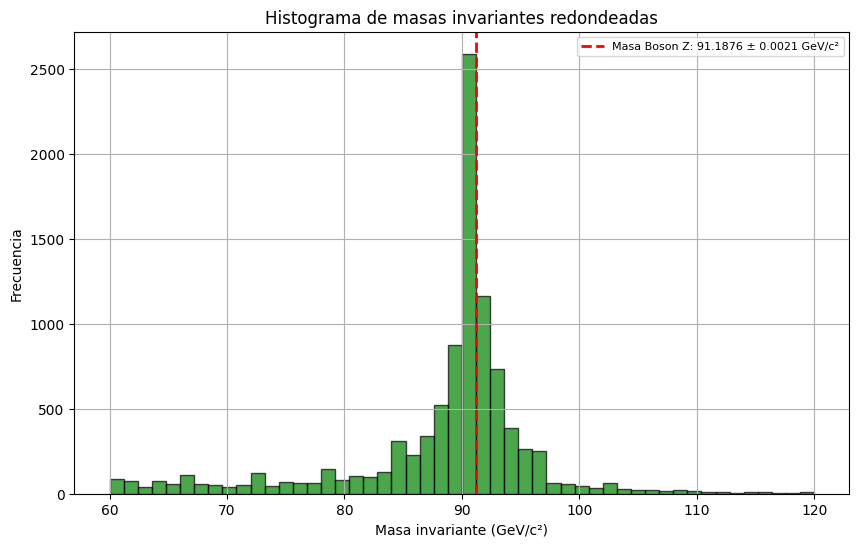

In [12]:
#Hisotgramas con filtro de cargas diferentes
# Crear la lista de masas invariantes (sin redondear)
M_i2 = np.sqrt(
    2 * eventos_Q_difs['pt1'] * eventos_Q_difs['pt2'] *
    (np.cosh(eventos_Q_difs['eta1'] - eventos_Q_difs['eta2']) -
     np.cos(eventos_Q_difs['phi1'] - eventos_Q_difs['phi2']))
)

# Crear la lista de masas redondeadas
M_r = np.round(M_i2)

# Crear el histograma de las masas redondeadas
fig = px.histogram(
    x=M_r,
    nbins=50,
    labels={'x': 'Masa invariante redondeada (GeV/c²)', 'y': 'Número de eventos'},
    title='Distribución de la masa invariante (Q1 ≠ Q2)',
    color_discrete_sequence=['indigo']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
#línea de referencia para el bosón Z (~91 GeV)
fig.update_layout(
    xaxis_title='Masa [GeV/c²]',
    yaxis_title='Eventos',
    showlegend=False
)




plt.figure(figsize=(10, 6))
plt.hist(M_r, bins=50, color='green', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
fig.show()
plt.show()

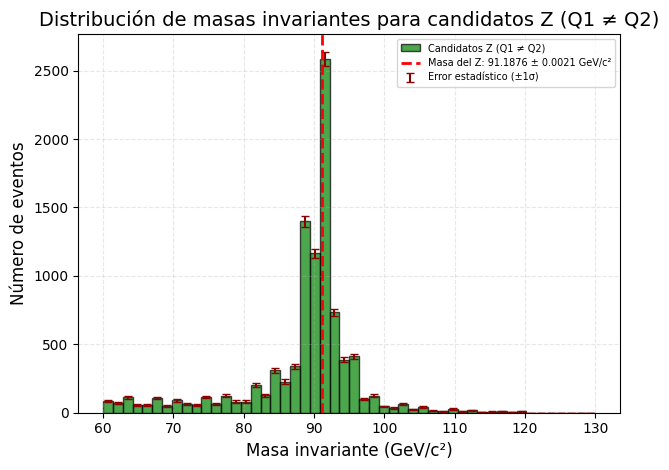

In [13]:
# Filtrar eventos con cargas opuestas (Q1 ≠ Q2)
eventos_Q_difs = particles[particles['Q1'] != particles['Q2']]

# Calcular masas invariantes
M_i2 = np.sqrt(2 * eventos_Q_difs['pt1'] * eventos_Q_difs['pt2'] *
    (np.cosh(eventos_Q_difs['eta1'] - eventos_Q_difs['eta2']) -
    np.cos(eventos_Q_difs['phi1'] - eventos_Q_difs['phi2'])
))
M_r = np.round(M_i2)
# Crear histograma (sin redondear, para mayor precisión)
bin_counts, bin_edges, _ = plt.hist(
    M_r,
    bins=50,
    range=(60, 130),  # Ajustar rango según tus datos
    color='green',
    edgecolor='black',
    alpha=0.7,
    label='Candidatos Z (Q1 ≠ Q2)'
)

# Calcular errores estadísticos (√N)
bin_errors = np.sqrt(bin_counts)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Centro de cada bin

# Añadir barras de error
plt.errorbar(
    bin_centers,
    bin_counts,
    yerr=bin_errors,
    fmt='none',         # Sin línea conectando puntos
    ecolor='darkred',   # Color de las barras de error
    capsize=3,          # Tamaño de las "tapas"
    label='Error estadístico (±1σ)'
)

# Línea vertical para la masa del bosón Z
plt.axvline(
    91.18,
    color='red',
    linestyle='dashed',
    linewidth=2,
    label='Masa del Z: 91.1876 ± 0.0021 GeV/c²'
)

# Personalización del gráfico
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z (Q1 ≠ Q2)', fontsize=14)
plt.legend(fontsize=7)
plt.grid(True, linestyle='--', alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()  # Mejorar espaciado
plt.show()

**Filtración por Factor ISO:**

Para "purificar" mas los datos, consideraremos un factor de ISO=0.5, para separar los posibles muones, de hadrones que dejen rastro en Hcal/Ecal, se espera obtener un histograma con menos ruido.

In [14]:
# Filtrar eventos donde iso1 < 0.5 Y iso2 < 0.5
Filtro_ISO = eventos_Q_difs[
    (eventos_Q_difs['iso1'] <= 0.5) &
    (eventos_Q_difs['iso2'] <= 0.5)
]

# Calcular la masa invariante para estos eventos
M_i3 = np.sqrt(
    2 * Filtro_ISO['pt1'] * Filtro_ISO['pt2'] *
    (np.cosh(Filtro_ISO['eta1'] - Filtro_ISO['eta2']) -
     np.cos(Filtro_ISO['phi1'] - Filtro_ISO['phi2']))
)

print(Filtro_ISO)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2 y aislamiento <= 1: {len(Filtro_ISO)}")

diff =len(eventos_Q_difs) - len(Filtro_ISO)
print("Diferencia entre los eventos filtrados por carga y filtrados por ISO:",diff)

         Run       Event      pt1    eta1    phi1  Q1    dxy1  iso1      pt2  \
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554   0.0  28.5389   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879   0.0  30.2344   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585   0.0  48.2790   
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384   0.0  39.8616   
8     165617    77076988  38.1511 -0.8702  1.7165   1 -0.0840   0.0  37.8959   
...      ...         ...      ...     ...     ...  ..     ...   ...      ...   
9992  173692  1243765024  51.2271  0.5585 -2.6090   1 -0.0034   0.0  28.6090   
9993  173692  1243515245  52.7978  0.4135  1.7001   1 -0.0811   0.0  39.9635   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311   0.0  40.7930   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417   0.0  47.7209   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361   0.0  41.0945   

        eta2    phi2  Q2    dxy2   iso2

De los 9664 casos filtrados por carga, 3605 de estos no cumplen con el factor ISO considerado para filtrar, siendo esto un 37.3%, el nuevo histograma obtenido es:


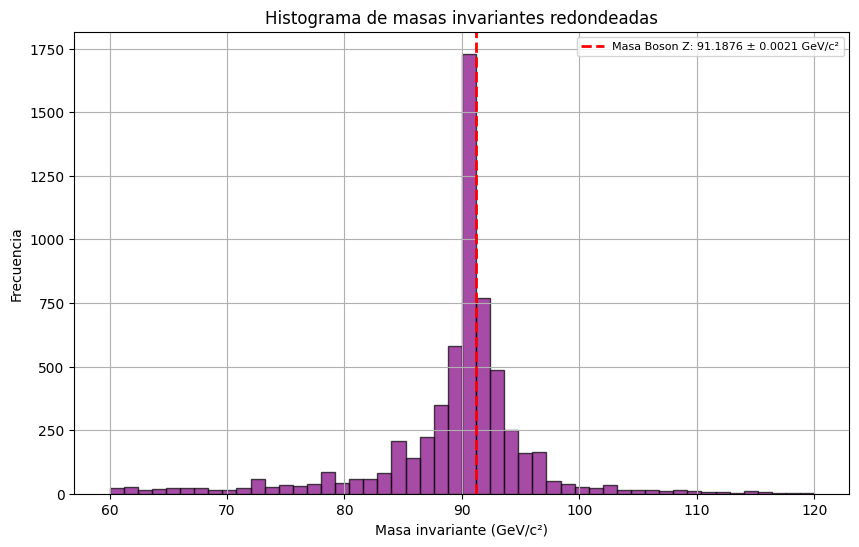

In [15]:
M_R1 = np.round(M_i3)

fig = px.histogram(
    x=M_R1,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso <= 0.5)',
    color_discrete_sequence=['teal']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R1, bins=50, color='purple', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

**FITRACION POR ISO RELATIVO**

Se considerara un cociente Iso_r = iso/pt

In [16]:
# Filtrar eventos con Iso Relativo:

filtro_ISOR = eventos_Q_difs[
    (eventos_Q_difs['iso1']/eventos_Q_difs['pt1'] < 0.15) &
    (eventos_Q_difs['iso2']/eventos_Q_difs['pt2'] < 0.15)
]

# Calcular la masa invariante para estos eventos
M_i4 = np.sqrt(
    2 * filtro_ISOR['pt1'] * filtro_ISOR['pt2'] *
    (np.cosh(filtro_ISOR['eta1'] - filtro_ISOR['eta2']) -
     np.cos(filtro_ISOR['phi1'] - filtro_ISOR['phi2']))
)

print(filtro_ISOR)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2 y aislamiento relativo < 0.15: {len(filtro_ISOR)}")

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
1     165617    75138253  24.5872 -2.0522  2.8666  -1 -0.0554  0.0000   
2     165617    75887636  31.7386 -2.2595 -1.3323  -1  0.0879  0.0000   
3     165617    75779415  39.7394 -0.7123 -0.3123   1  0.0585  0.0000   
4     165617    75098104  41.2998 -0.1571 -3.0408   1 -0.0305  1.2280   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9994  173692  1244153861  38.1252 -0.4428 -2.2370  -1  0.0311  0.0000   
9996  173692  1244979327  39.4543 -1.1310 -2.0568   1  0.0417  0.0000   
9997  173692  1245305163  40.6034 -1.5051 -1.6758  -1  0.0635  0.2012   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987  -1  0.0712  3.4221  
1     28.5389  0.38

HISTOGRAMA PARA FILTRO ISO RELATIVO:

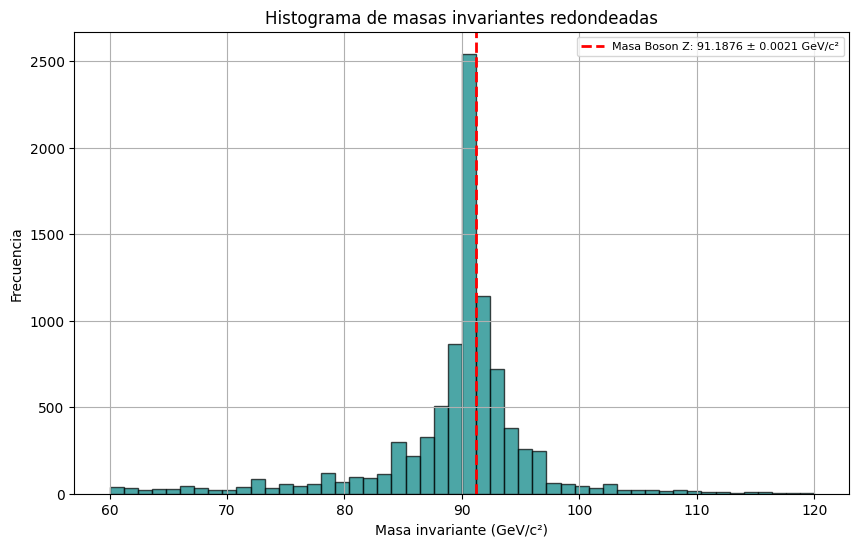

In [17]:
M_R2 = np.round(M_i4)

fig = px.histogram(
    x=M_R2,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso_r < 0.15)',
    color_discrete_sequence=['black']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R2, bins=50, color='teal', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

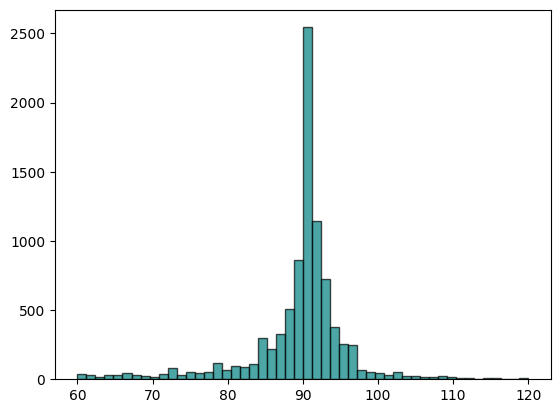

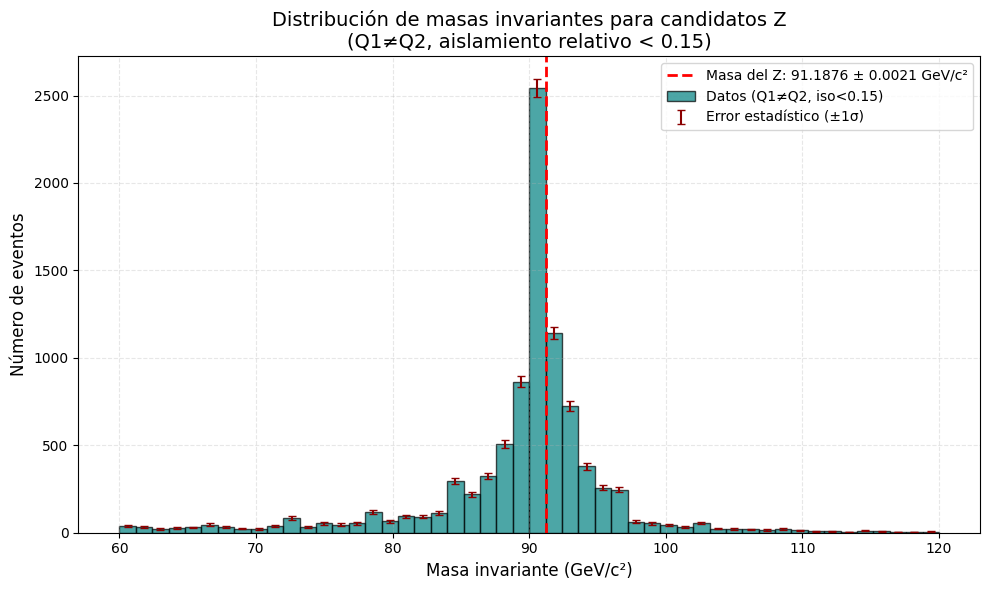

In [18]:
#Error ISO_r
# Calcular errores estadísticos (Poisson: √N)
counts, bins, _ = plt.hist(M_R2, bins=50, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='teal', edgecolor='black', alpha=0.7,
       label='Datos (Q1≠Q2, iso<0.15)')

# Añadir barras de error
plt.errorbar(bin_centers, counts, yerr=errors,
            fmt='none', ecolor='darkred', capsize=3,
            label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1≠Q2, aislamiento relativo < 0.15)', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

**AISLAMIENTO POR BACK TO BACK**

In [19]:
#Definicion de Deltaphi
D_phi = np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2'])
filtro_Dp = filtro_ISOR[
    (np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2']) < 3.2) &
    (np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2']) > 3)
]

# Calcular la masa invariante para estos eventos
M_i5 = np.sqrt(
    2 * filtro_Dp['pt1'] * filtro_Dp['pt2'] *
    (np.cosh(filtro_Dp['eta1'] - filtro_Dp['eta2']) -
     np.cos(filtro_Dp['phi1'] - filtro_Dp['phi2']))
)

print(filtro_Dp)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, aislamiento relativo < 0.15 y back to back: {len(filtro_Dp)}")

         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
0     165617    74969122  54.7055 -0.4324  2.5742   1 -0.0745  0.4999   
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
6     165617    76042048  42.8278 -0.9549 -0.2418  -1  0.0513  0.6926   
12    165617    76179155  45.0624 -1.9459 -1.0347   1  0.0848  0.4751   
13    165617    75954345  33.5015  0.8150 -1.2105  -1  0.0861  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9979  173692  1243187602  54.5563  0.2367 -2.6182   1 -0.0070  1.1444   
9980  173692  1243854079  35.4678 -2.3445 -1.0009   1  0.0777  0.0000   
9991  173692  1243701832  43.1575  0.4913 -1.5485   1  0.0710  0.0000   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   
9999  173692  1244770092  40.7389  1.1202 -0.2863  -1  0.0670  0.6457   

          pt2    eta2    phi2  Q2    dxy2    iso2  
0     34.2464 -0.9885 -0.4987  -1  0.0712  3.4221  
5     39.8616  0.26

HISTOGRAMA CON FILTRACION BACK TO BACK

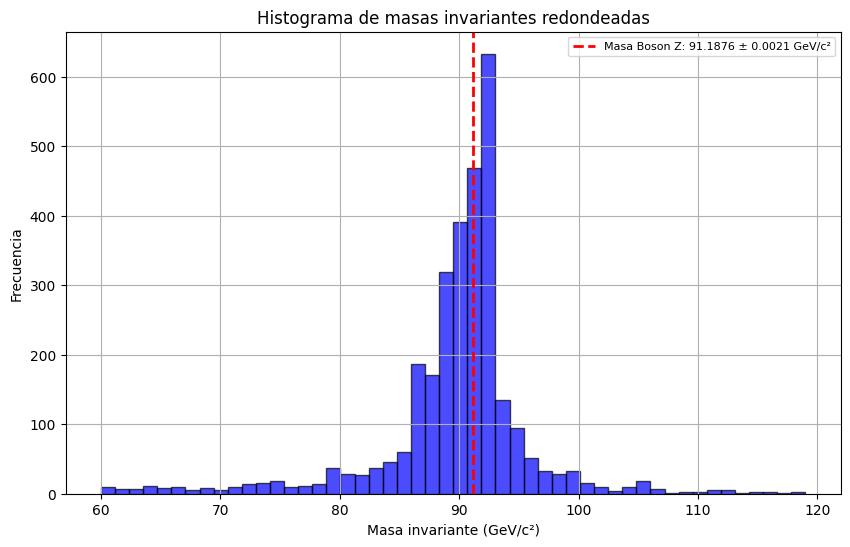

In [35]:
M_R3 = np.round(M_i5)

fig = px.histogram(
    x=M_R3,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso_r < 0.15, BtoB)',
    color_discrete_sequence=['black']
)
fig.add_vline(x=91.1876, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R3, bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

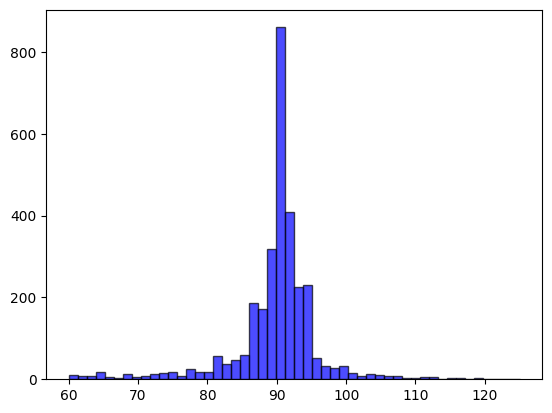

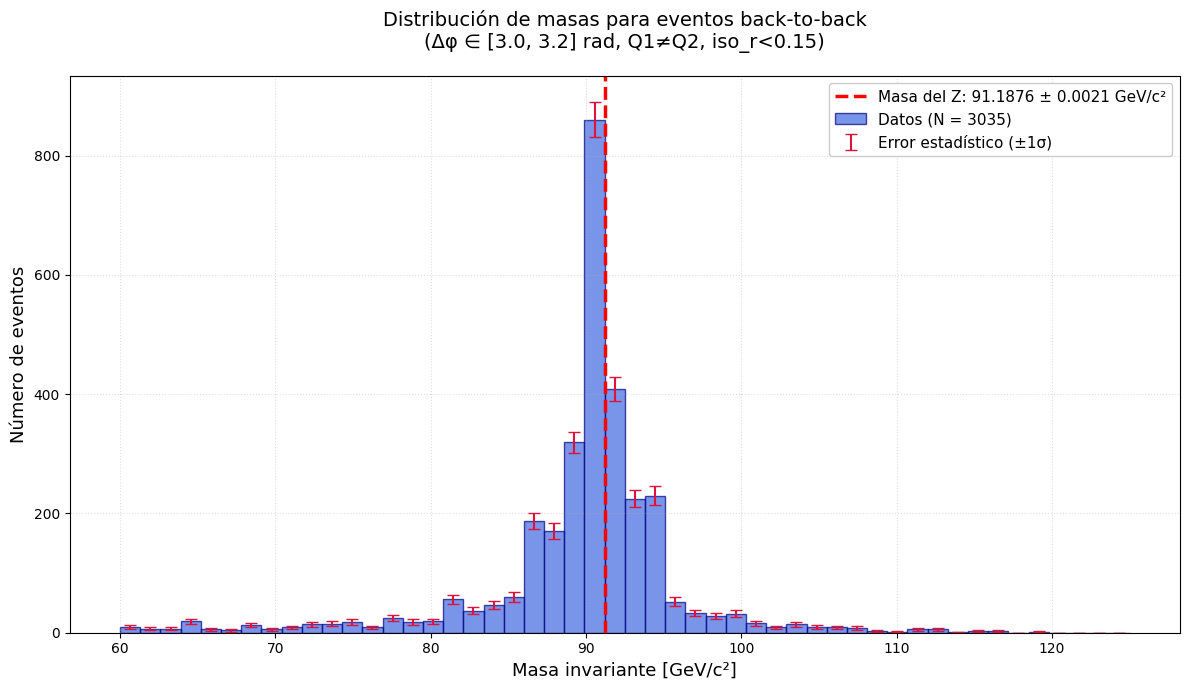

In [34]:
# Definir Δφ y aplicar filtro
D_phi = np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2'])
filtro_Dp = filtro_ISOR[(D_phi > 3.0) & (D_phi < 3.2)]  # Eventos back-to-back

# Calcular masa invariante
M_i5 = np.sqrt(
    2 * filtro_Dp['pt1'] * filtro_Dp['pt2'] *
    (np.cosh(filtro_Dp['eta1'] - filtro_Dp['eta2']) -
     np.cos(filtro_Dp['phi1'] - filtro_Dp['phi2']))
)

# Crear histograma con errores
counts, bins, _ = plt.hist(M_R3, bins=50, range=(60, 125),  # Ajustar rango según necesidad
                          color='blue', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(counts)  # Error estadístico Poisson

plt.figure(figsize=(12, 7))
# Barras del histograma
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='royalblue', edgecolor='navy', alpha=0.7,
       label=f'Datos (N = {len(filtro_Dp)})')

# Barras de error
plt.errorbar(bin_centers, counts, yerr=errors,
            fmt='none', ecolor='crimson', capsize=4,
            label='Error estadístico (±1σ)')

# Línea del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2.5,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Ajustes estéticos
plt.xlabel('Masa invariante [GeV/c²]', fontsize=13)
plt.ylabel('Número de eventos', fontsize=13)
plt.title('Distribución de masas para eventos back-to-back\n(Δφ ∈ [3.0, 3.2] rad, Q1≠Q2, iso_r<0.15)',
         fontsize=14, pad=20)
plt.legend(fontsize=11, framealpha=1)
plt.grid(True, linestyle=':', alpha=0.4)

# Mostrar estadísticas en el gráfico
#stats_text = (f'Eventos: {len(filtro_Dp)}\n'
             #f'Mean: {np.mean(M_i5):.1f} GeV/c²\n'
             ##f'RMS: {np.std(M_i5):.1f} GeV/c²')
#plt.text(0.75, 0.95, stats_text,
        #transform=plt.gca().transAxes,
        #verticalalignment='top',
        #bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

FILTRACION POR PARAMETRO DE IMPACTO

In [22]:
#Definicion del filtro

filtro_dxy = filtro_Dp[
    (np.abs(filtro_Dp['dxy1']) < 0.05) &
    (np.abs(filtro_Dp['dxy2']) < 0.05)
]

# Calcular la masa invariante para estos eventos
M_i6 = np.sqrt(
    2 * filtro_dxy['pt1'] * filtro_dxy['pt2'] *
    (np.cosh(filtro_dxy['eta1'] - filtro_dxy['eta2']) -
     np.cos(filtro_dxy['phi1'] - filtro_dxy['phi2']))
)

print(filtro_dxy)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, aislamiento relativo < 0.15, back to back y dxy < 0.05: {len(filtro_dxy)}")


         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
32    165617    81858428  39.9829  0.8042 -2.9504   1 -0.0217  0.0000   
43    165617    82592490  43.9286  1.7747  0.9734   1 -0.0448  0.0000   
50    165617    83748650  42.5759  0.4798 -2.5628  -1  0.0140  0.0000   
57    165617    86734124  45.0781  1.1524  0.2215   1  0.0202  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9958  173692  1241695518  42.8300 -1.5802 -2.8106  -1 -0.0184  0.0000   
9967  173692  1242249879  31.2014 -1.4043 -2.4203  -1  0.0169  0.8108   
9977  173692  1242343122  37.4613  0.9711 -2.0027  -1  0.0492  0.5597   
9979  173692  1243187602  54.5563  0.2367 -2.6182   1 -0.0070  1.1444   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   

          pt2    eta2    phi2  Q2    dxy2    iso2  
5     39.8616  0.2630  0.9183   1 -0.0407  0.0000  
32    42.5688  0.66

HISTOGRAMA CON FILTRACION DE PARAMETRO DE IMPACTO

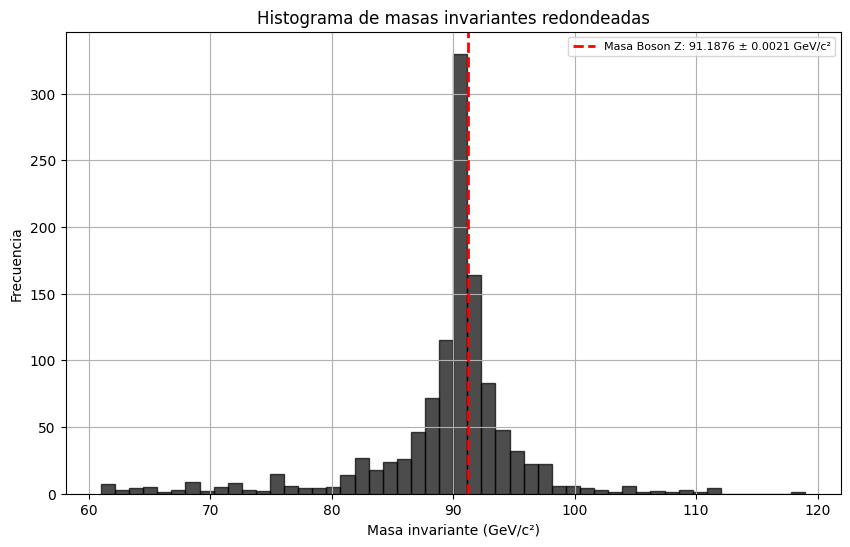

In [23]:
M_R4 = np.round(M_i6)

fig = px.histogram(
    x=M_R4,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso_r < 0.15, BtoB, dxy < 0.05)',
    color_discrete_sequence=['black']
)
fig.add_vline(x=91.1876, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R4, bins=50, color='black', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

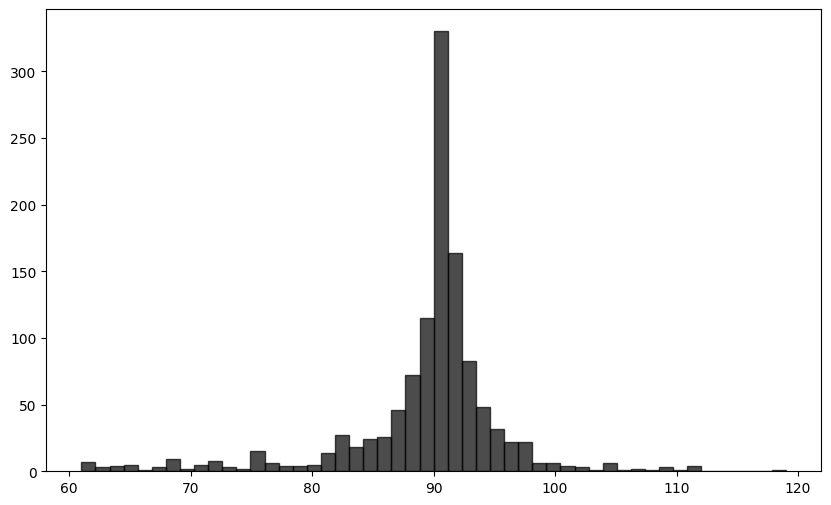

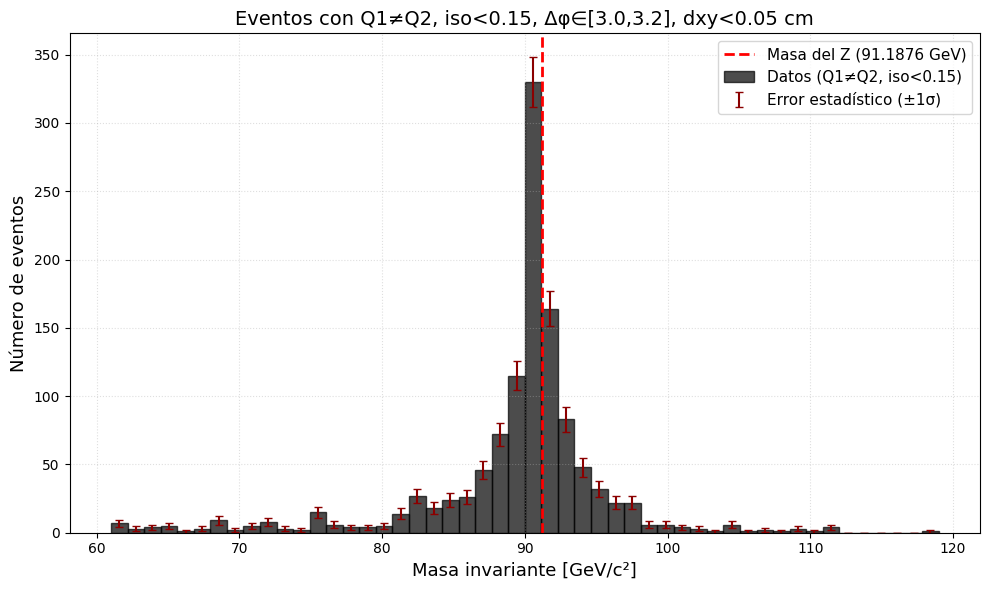

In [33]:


# Versión Matplotlib con errores
plt.figure(figsize=(10, 6))
# Calcular errores estadísticos (Poisson: √N)
counts, bins, _ = plt.hist(M_R4, bins=50, color='black', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='black', edgecolor='black', alpha=0.7,
       label='Datos (Q1≠Q2, iso<0.15)')

# Añadir barras de error
plt.errorbar(bin_centers, counts, yerr=errors,
            fmt='none', ecolor='darkred', capsize=3,
            label='Error estadístico (±1σ)')

# Línea del Z
plt.axvline(91.1876, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z (91.1876 GeV)')

# Personalización
plt.xlabel('Masa invariante [GeV/c²]', fontsize=13)
plt.ylabel('Número de eventos', fontsize=13)
plt.title('Eventos con Q1≠Q2, iso<0.15, Δφ∈[3.0,3.2], dxy<0.05 cm', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.4)


plt.tight_layout()
plt.show()

**FILTRACION FINAL POR COCIENTE DE MOMENTOS TRANSVERSALES**

In [25]:
#Definimos la filtracion
R = filtro_dxy[
    (filtro_dxy['pt1']/filtro_dxy['pt2'] > 0.8) &
    (filtro_dxy['pt1']/filtro_dxy['pt2'] < 1.2)
]

# Calcular la masa invariante para estos eventos
M_i7 = np.sqrt(
    2 * R['pt1'] * R['pt2'] *
    (np.cosh(R['eta1'] - R['eta2']) -
     np.cos(R['phi1'] - R['phi2']))
)

print(R)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, aislamiento relativo < 0.15, back to back, dxy < 0.05, 0.8 < pt1/pt2 < 1.2: {len(R)}")


         Run       Event      pt1    eta1    phi1  Q1    dxy1    iso1  \
5     165617    77255513  38.9425  0.3522 -2.2649  -1  0.0384  0.0000   
32    165617    81858428  39.9829  0.8042 -2.9504   1 -0.0217  0.0000   
50    165617    83748650  42.5759  0.4798 -2.5628  -1  0.0140  0.0000   
57    165617    86734124  45.0781  1.1524  0.2215   1  0.0202  0.0000   
80    165617    91419180  38.3471  1.3066 -2.5247   1  0.0123  0.0000   
...      ...         ...      ...     ...     ...  ..     ...     ...   
9955  173692  1241904948  46.1085  0.1132 -2.9623  -1 -0.0346  2.4160   
9958  173692  1241695518  42.8300 -1.5802 -2.8106  -1 -0.0184  0.0000   
9967  173692  1242249879  31.2014 -1.4043 -2.4203  -1  0.0169  0.8108   
9977  173692  1242343122  37.4613  0.9711 -2.0027  -1  0.0492  0.5597   
9998  173692  1245041468  37.2853  1.0024 -2.1486   1  0.0361  0.0000   

          pt2    eta2    phi2  Q2    dxy2    iso2  
5     39.8616  0.2630  0.9183   1 -0.0407  0.0000  
32    42.5688  0.66

HISTOGRAMA FINAL


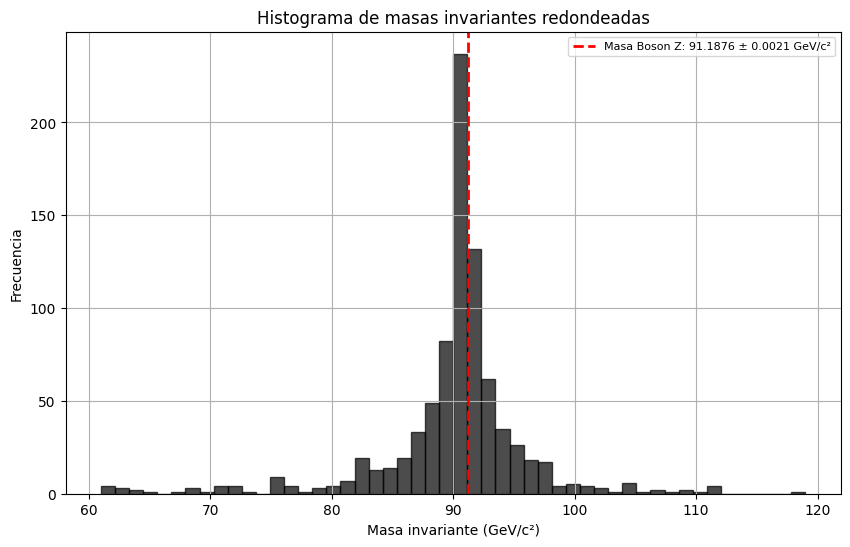

In [26]:
M_R5 = np.round(M_i7)

fig = px.histogram(
    x=M_R5,
    nbins=50,
    labels={'x': 'Masa invariante [GeV/c²]', 'y': 'Eventos'},
    title='Masa invariante para mejores candidatos para muones (Q1 ≠ Q2, iso_r < 0.15, BtoB, dxy < 0.05)',
    color_discrete_sequence=['black']
)
fig.add_vline(x=91.1876, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
fig.show()


plt.figure(figsize=(10, 6))
plt.hist(M_R5, bins=50, color='black', edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

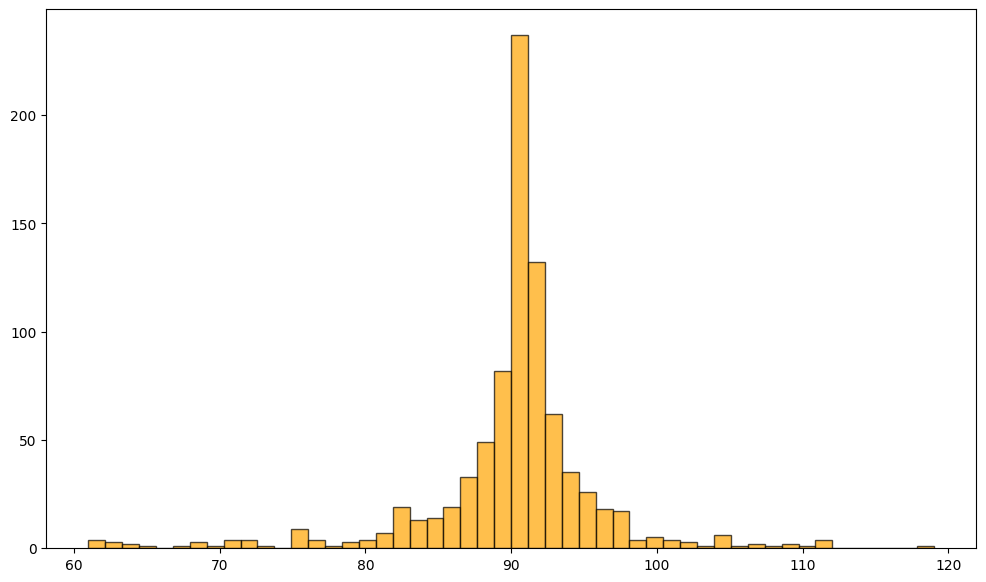

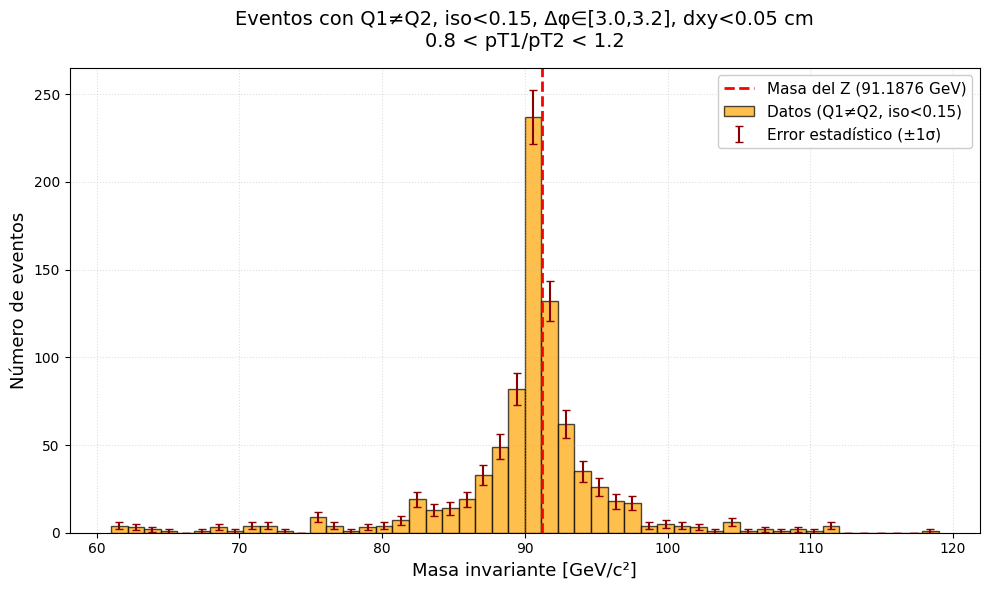

In [31]:

# Versión Matplotlib con errores
plt.figure(figsize=(12, 7))
# Calcular errores estadísticos (Poisson: √N)
counts, bins, _ = plt.hist(M_R5, bins=50, color='orange', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='orange', edgecolor='black', alpha=0.7,
       label='Datos (Q1≠Q2, iso<0.15)')

# Añadir barras de error
plt.errorbar(bin_centers, counts, yerr=errors,
            fmt='none', ecolor='darkred', capsize=3,
            label='Error estadístico (±1σ)')

# Línea del Z
plt.axvline(91.1876, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z (91.1876 GeV)')

# Personalización
plt.xlabel('Masa invariante [GeV/c²]', fontsize=13)
plt.ylabel('Número de eventos', fontsize=13)
plt.title('Eventos con Q1≠Q2, iso<0.15, Δφ∈[3.0,3.2], dxy<0.05 cm\n0.8 < pT1/pT2 < 1.2',
          fontsize=14, pad=15)
plt.legend(fontsize=11, framealpha=1)
plt.grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

AJUSTE BREIT-WIGNER

In [ ]:
#final boss

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def breit_wigner(E, M, Gamma, A):
    return A / ((E**2 - M**2)**2 + (M * Gamma)**2)

# Crear histograma para ajuste
hist, bin_edges = np.histogram(M_R5, bins=50, range=(60, 120))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Puntos medios de los bins

# Adjust initial parameters and bounds based on the previous successful fit
# M_Z = 91.458 ± 0.102 GeV
# Gamma_Z = 4.240 ± 0.335 GeV
p0 = [91.4, 4.2, 1e5]  # Adjusted initial guesses
bounds = ([90, 3, 0], [93, 6, 1e7])  # Adjusted bounds

try:
    # Ajuste with increased maxfev
    params, covariance = curve_fit(
        breit_wigner,
        bin_centers,
        hist,
        p0=p0,
        bounds=bounds,
        maxfev=20000 # Increased maximum number of function evaluations
    )

    # Parámetros obtenidos
    M_fit, Gamma_fit, A_fit = params
    print(f"Masa ajustada (M): {M_fit:.2f} GeV")
    print(f"Ancho de decaimiento (Γ): {Gamma_fit:.2f} GeV")

    plt.figure(figsize=(10, 6))
    plt.hist(M_R5, bins=50, range=(60, 120), color='skyblue', edgecolor='black', alpha=0.7, label='Datos')
    plt.plot(bin_centers, breit_wigner(bin_centers, *params), 'r-', linewidth=2, label='Ajuste Breit-Wigner')
    plt.xlabel('Masa invariante [GeV/c²]')
    plt.ylabel('Eventos')
    plt.legend()
    plt.title('Ajuste de Breit-Wigner a la distribución de masas')
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    print("The fit failed. This could be due to the initial parameters or bounds.")

In [47]:
#Histogram
masas = M_R5 #AQUI COLOCAN SUS DATOS
bin_w = 1.0

lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil (masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)
counts, edges = np.histogram(masas, bins=bins)
centros = 0.5 * (edges[:-1] + edges[1:])

#Breit-Wigner
def breit_wigner(m, M, Gamma):
    num = M**2 * Gamma**2
    denom = (m**2 - M**2)**2 + M**2 * Gamma**2
    return num / denom
#Normalizamos
def modelo(m, M, Gamma, N, a, b):
    return N * breit_wigner(m, M, Gamma)+ a + b * m

from scipy.optimize import curve_fit # Import curve_fit

mask = (centros > 80) & (centros < 100)
x_fit = centros[mask]
y_fit = counts[mask]
sigma = np.sqrt(np.where(y_fit > 0, y_fit, 1))

p0 = [91.2, 2.5, y_fit.max()*5, y_fit.min(), 0.0]

popt, pcov = curve_fit(modelo, x_fit, y_fit, p0=p0, sigma=sigma, absolute_sigma=True, maxfev=10000)

M_Z, Gamma_Z, N_sig, a_bg, b_bg = popt
dM_Z, dGamma_Z = np.sqrt(np.diag(pcov))[:2]

print(f"M_Z = {M_Z:.3f} ± {dM_Z:.3f} GeV") #IMPRIME EL PICO
print(f"Gamma_Z = {Gamma_Z:.3f} ± {dGamma_Z:.3f} GeV") #IMPRIME EL ANCHO

#Creamos figura
m_plot = np.linspace(lo_edge, hi_edge, 2000)
total_y = modelo(m_plot, *popt)
signal_y = N_sig * breit_wigner(m_plot, M_Z, Gamma_Z)

# Agregando errores estadísticos al gráfico
hist_with_errors = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)"),
    error_y=dict(
        type='sqrt',  # Error Poisson (√N)
        array=np.sqrt(counts),
        visible=True,
        color='rgba(100,100,100,0.8)'
    )
)

hist = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)")
)

total_fit = go.Scatter(
    x=m_plot, y=total_y,
    mode="lines", name="Ajuste total",
    line=dict(color="orange"))
signal_Z = go.Scatter(
    x=m_plot, y=signal_y,
    mode="lines", name="Señal Z",
    line=dict(color="green", dash="dash"))

#fig = go.Figure(data=[hist, total_fit, signal_Z])
# Creando figura con todos los elementos
fig = go.Figure(data=[hist_with_errors, total_fit, signal_Z])

# Añadiendo línea vertical para la masa del Z
#fig.add_vline(
    #x=91.1876,
    #line_dash="dot",
    #line_color="red",
    #annotation_text=f"Z: {M_Z:.2f} ± {dM_Z:.2f} GeV",
    #annotation_position="top right"
#)



fig.update_layout(
    title="Masa invariante μ⁺μ⁻ con ajuste Breit-Wigner",
    xaxis_title="Masa invariante [GeV/c²]",
    yaxis_title=f"Eventos / {bin_w} GeV",
    bargap=0.05,
    template="plotly_white",
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)
fig.show()

M_Z = 91.458 ± 0.102 GeV
Gamma_Z = 4.240 ± 0.335 GeV


HISTOGRAMAS CON ERRORBARS

In [43]:
# Agregando errores estadísticos al gráfico
masas = M_R5
bin_w = 1.0
lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil (masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)
counts, edges = np.histogram(masas, bins=bins)
centros = 0.5 * (edges[:-1] + edges[1:])

#Breit-Wigner
def breit_wigner(m, M, Gamma):
    num = M**2 * Gamma**2
    denom = (m**2 - M**2)**2 + M**2 * Gamma**2
    return num / denom
#Normalizamos
def modelo(m, M, Gamma, N, a, b):
    return N * breit_wigner(m, M, Gamma)+ a + b * m


hist_with_errors = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)"),
    error_y=dict(
        type='sqrt',  # Error Poisson (√N)
        array=np.sqrt(counts),
        visible=True,
        color='rgba(100,100,100,0.8)'
    )
)

m_plot = np.linspace(lo_edge, hi_edge, 2000)
total_y = modelo(m_plot, *popt)
signal_y = N_sig * breit_wigner(m_plot, M_Z, Gamma_Z)



total_fit = go.Scatter(
    x=m_plot, y=total_y,
    mode="lines", name="Ajuste total",
    line=dict(color="orange"))
signal_Z = go.Scatter(
    x=m_plot, y=signal_y,
    mode="lines", name="Señal Z",
    line=dict(color="green", dash="dash"))

# Creando figura con todos los elementos
fig = go.Figure(data=[hist_with_errors, total_fit, signal_Z])

# Añadiendo línea vertical para la masa del Z
fig.add_vline(
    x=91.1876,
    line_dash="dot",
    line_color="red",
    annotation_text=f"Z: {M_Z:.2f} ± {dM_Z:.2f} GeV",
    annotation_position="top right"
)

# Mejorando el layout
fig.update_layout(
    title="Masa invariante μ⁺μ⁻ con ajuste Breit-Wigner",
    xaxis_title="Masa invariante [GeV/c²]",
    yaxis_title=f"Eventos / {bin_w} GeV",
    bargap=0.05,
    template="plotly_white",
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)

fig.show()

NameError: name 'popt' is not defined